In [1]:
import os
import numpy as np
#import cupy as cp
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from Utils99 import *
from Utils_graph import *
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

window = 1024
fs = 25600

In [15]:
dir = '02_VMD_V/'
out = '03_FTRS_V/'
brngs = os.listdir(dir)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs:

    print(brng)
    features = []
    samples = os.listdir(dir+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    for sample in samples:
        df = pd.read_csv(dir+brng+'/'+sample)
        sig = df['IMF1'].values
        sig = sig-np.mean(sig)
        tf, tn = time_features(sig)
        ff, fn = freq_features(sig)
        features.append(tf+ff)
    features = pd.DataFrame(features)
    features.columns = tn+fn
    features.to_csv(out+brng+'.csv',index=False)

Bearing1_1
Bearing1_2
Bearing1_3
Bearing1_5
Bearing2_2
Bearing2_4


PLOT ALL FEATURES AND SAVE PLOT

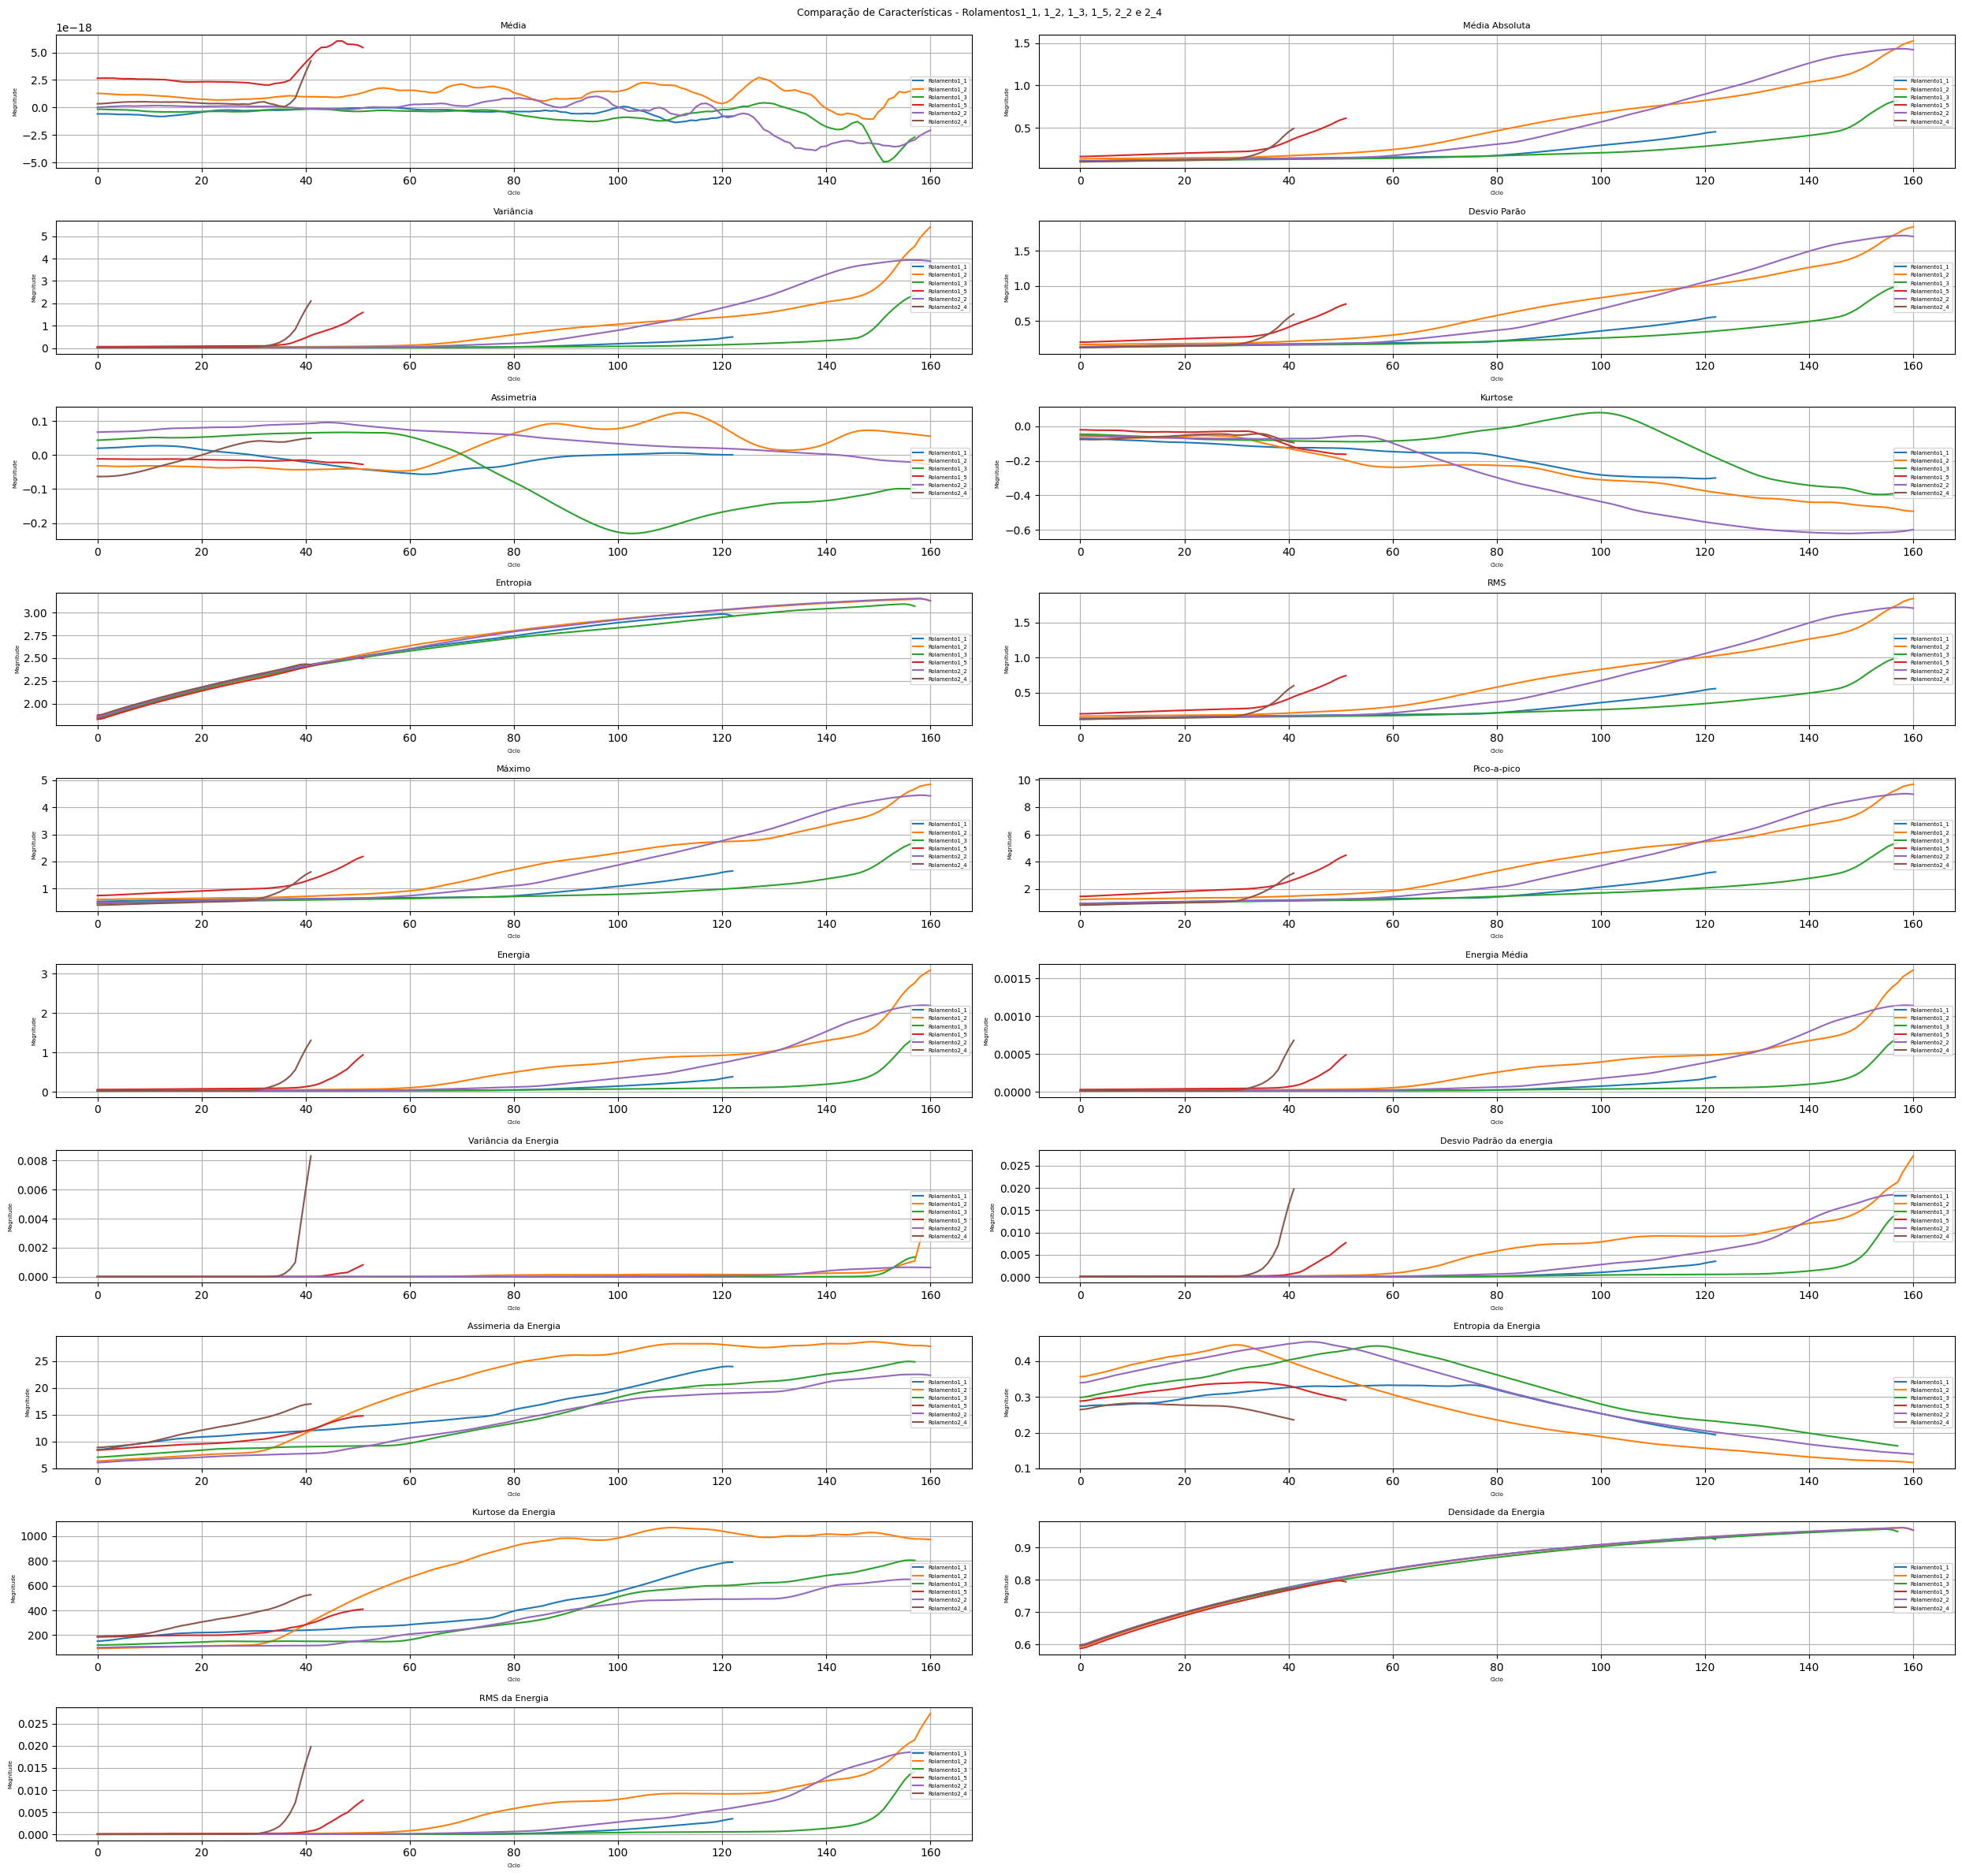

In [16]:
dir = '03_FTRS_V/'
out = '04_FLTR_V/'

brngs = os.listdir(dir)
labels = [('Rolamento'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = moving_average_df(df,5) #5
    df=exponential_moving_average_df(df, alpha=0.015) #0.015
    df.to_csv(out+brng, index=False)
    dfs.append(df)
plot_multiple_features(dfs,out, 2, brngs, labels, show=False, w=25, h=25)

Index(['Variância', 'Pico-a-pico', 'Média Absoluta', 'RMS', 'Probability',
       'Energia Média', 'Máximo', 'Energia', 'Entropia',
       'Densidade da Energia', 'Desvio Parão'],
      dtype='object')

FILTER BY METRICS (MONOTONICITY, TRENDABILITY AND CORRELATION)

In [ ]:
dir = '04_FLTR_V/'
out = '05_FLTR2_V/'
brngs = os.listdir(dir)
qtd=4
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    df = plot_metrics(df,out,cols_qtd=qtd,brng=brng, show=False, w = 8, h=6)
    df.to_csv(out+brng, index=False)

SELECT THE SAME FEATURES

In [21]:
dir ='05_FLTR2_V/'
brngs = os.listdir(dir)
clmns = []
for brng in brngs:
    df=pd.read_csv(dir+brng)
    #probability = (np.array([(1/(1+i))*np.sin() for i in range(len(df))]))
    #probability = np.array([math.exp(i+1e-12) for i in range(len(df))])
    #df.insert(len(df.columns), 'Probability',probability)
    df = df.drop('Assimeria da Energia', axis=1)
    df = df.drop('Desvio Padrão da energia', axis=1)
    df = df.drop('RMS da Energia', axis=1)
    df.to_csv(dir+brng,index=False)
 

Entropia,RMS,Variância,Pico-a-pico,Energia,Máximo,Desvio Parão,Energia Média,Densidade da Energia,Média Absoluta

In [22]:
dir ='05_FLTR2_V/'
brngs = os.listdir(dir)
clmns = []
for brng in brngs:
    df=pd.read_csv(dir+brng)
    clmns.append(df.columns)
features = set(clmns[0]).intersection(*clmns[1:])
features = list(features)

for brng in brngs:
    df_r = pd.DataFrame()
    df=pd.read_csv(dir+brng)

    for feature in features:
        df_r[feature] = df[feature]
    df_r.to_csv(dir+brng,index=False)
print(df_r.columns)

Index(['Densidade da Energia', 'Entropia', 'Máximo', 'RMS', 'Desvio Parão',
       'Variância', 'Pico-a-pico', 'Energia', 'Média Absoluta',
       'Energia Média'],
      dtype='object')


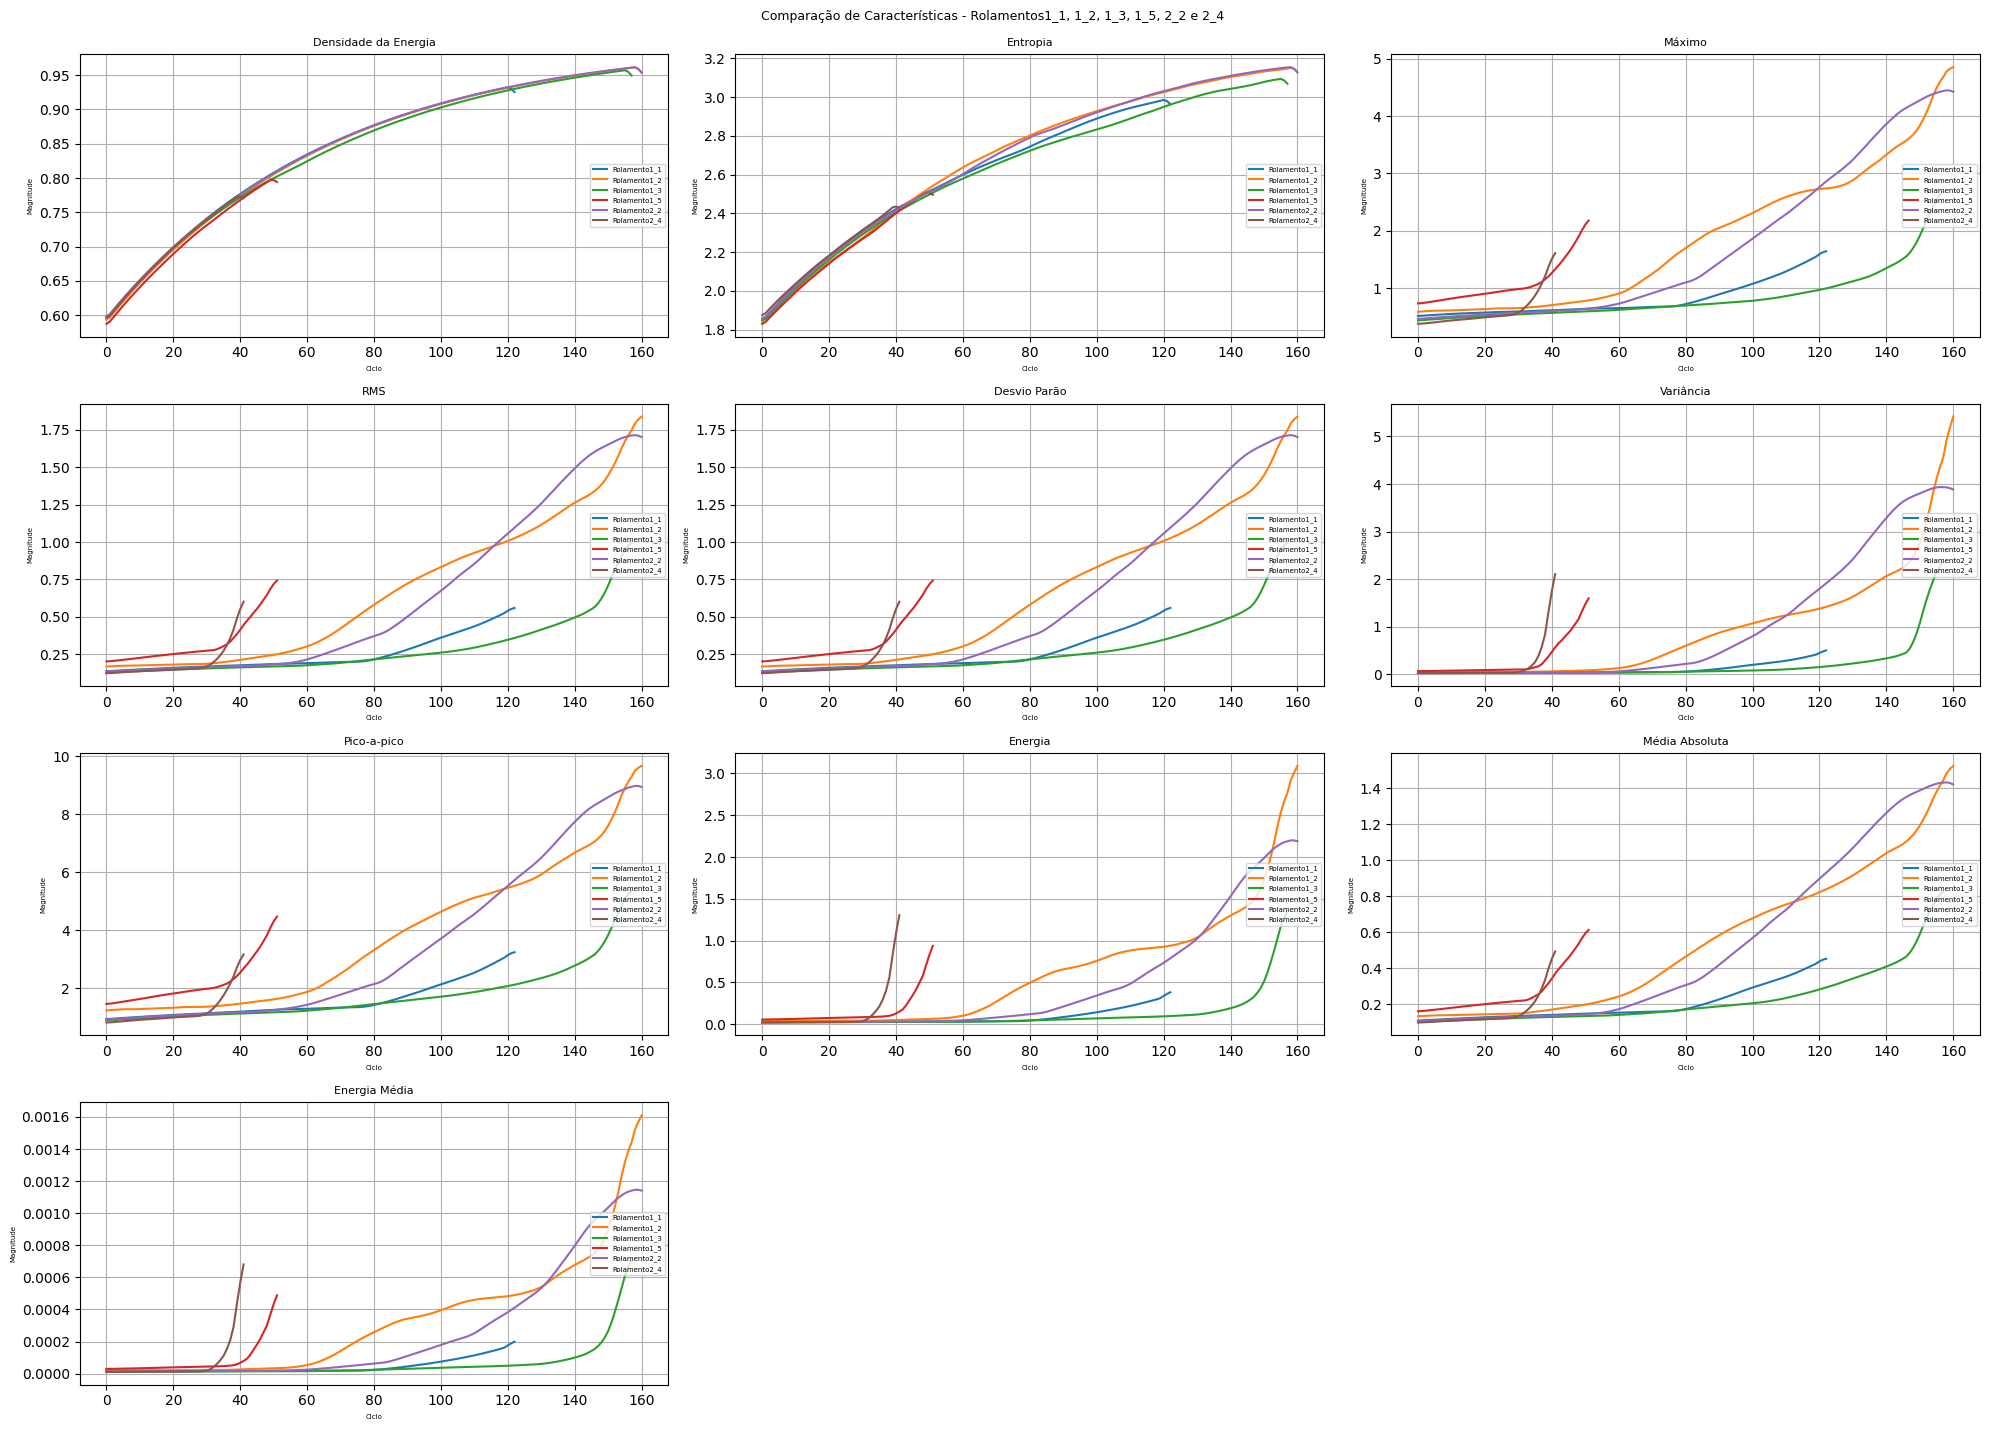

In [23]:
dir = '05_FLTR2_V/'
brngs = os.listdir(dir)
labels = [('Rolamento'+brngs[i][7:-4]) for i in range(len(brngs))]
qtd=6
dfs = []
for brng in brngs:
    path = dir+brng
    df = pd.read_csv(dir+brng)
    dfs.append(df)
plot_multiple_features(dfs,out, 3, brngs, labels, show=False, w=20, h=15)

CREATE PCA HI

In [29]:
dir = '05_FLTR2/'
out = '09_HI/'
brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for frame,brng in zip(dataframes,brngs):
    dados_fundidos, modelo_pca = aplicar_pca_e_fundir(frame, n_componentes=5)
    dados_fundidos.to_csv(out+brng,index=False)
    dfs.append(dados_fundidos)

df_r = pd.concat(dfs,ignore_index=True)
df_r = normalize_df(df_r)
dfs = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]
for df,brng in zip(dfs,brngs):
    df.to_csv(out+brng,index=False)


05_FLTR2/Bearing1_1.csv
05_FLTR2/Bearing1_2.csv
05_FLTR2/Bearing1_3.csv
05_FLTR2/Bearing1_5.csv
05_FLTR2/Bearing2_2.csv
05_FLTR2/Bearing2_4.csv


In [30]:
dir = '09_HI/'
out = '09_HI/'
brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    if brng.startswith('Bearing2_1'):
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df[:])
        lens.append(len(df[:])+lens[-1])
    else:
        path = dir+brng
        df = pd.read_csv(path)
        #minV = np.min(df['PC1'])
        #df = df-minV
        
        dataframes.append(-df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for df,brng in zip(dataframes,brngs):
    df.to_csv(out+brng,index=False)
i=0

PLOT HEALTH/DEGRADATION INDICATOR

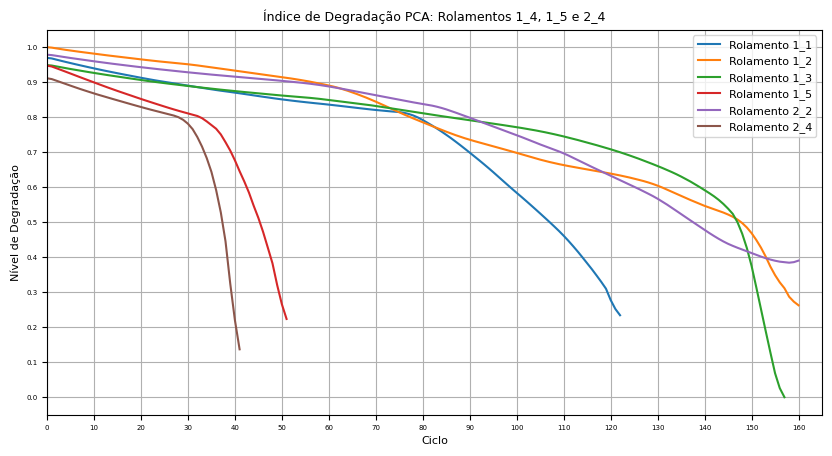

In [26]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

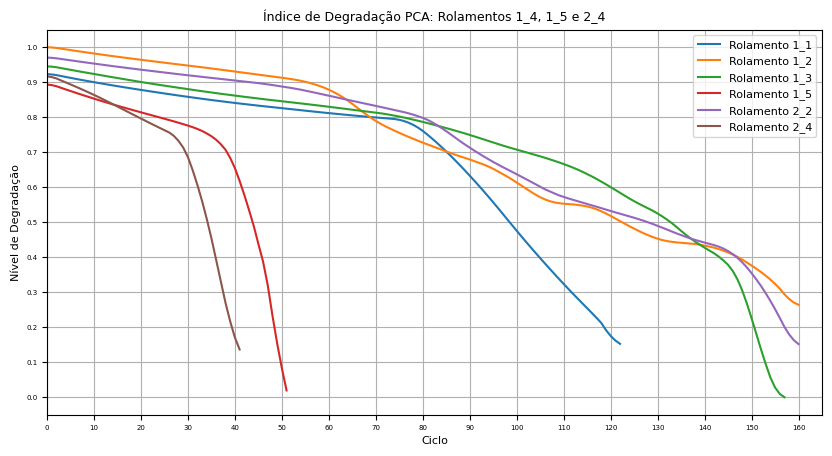

In [31]:
labels = [brng[:-4] for brng in brngs]
length = 0
plt.figure(figsize=(10, 5))
for i,df in enumerate(dataframes,start=0):
    if len(df) > length:
        length = len(df)
    hi = df['PC1'].values
    plt.plot(hi,linestyle='-',markersize =2, label='Rolamento '+labels[i][7:])
plt.legend(loc="upper right",fontsize = 8) 
plt.xlabel("Ciclo",fontsize=8)
plt.ylabel("Nível de Degradação",fontsize=8)
plt.title("Índice de Degradação PCA: Rolamentos 1_4, 1_5 e 2_4",fontsize = 9)
xticks = list(np.arange(0, ((int(length/5)+1)*5), 10))
yticks = list(np.arange(0, 1.05, 0.1))
plt.xlim(0,((int(length/5)+1)*5))
plt.xticks(sorted(xticks), fontsize=5, color='black')
plt.yticks(sorted(yticks), fontsize=5, color='black')
plt.grid(True)
#plt.savefig(out+'PCA_HI.eps', dpi=500)
#plt.savefig(out+'PCA_HI.png', dpi=500)
plt.show()

In [11]:
def coef_ang(x, y):
    """
    Calcula os coeficientes angulares entre pares consecutivos de pontos.

    Parâmetros:
    x: vetor (array-like) com coordenadas x
    y: vetor (array-like) com coordenadas y

    Retorna:
    np.ndarray: vetor com coeficientes angulares m[i] entre os pontos (x[i], y[i]) e (x[i+1], y[i+1])
    """
    x = np.array(x)
    y = np.array(y)
    
    dx = np.diff(x)
    dy = np.diff(y)

    # Evita divisão por zero para segmentos verticais
    with np.errstate(divide='ignore', invalid='ignore'):
        m = dy / dx
        m[np.isinf(m)] = np.nan  # Define NaN onde a reta é vertical

    return m

In [7]:
path = '02_VMD/Bearing1_1/121.csv'
df = pd.read_csv(path)
df = df_env(df,fs)
df = df[:len(df)//6]
plot_single(df['FREQ'],df['Mode_0'])

(-20.0, 20.0)

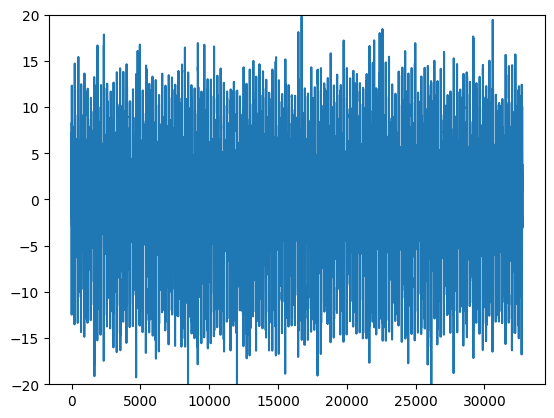

In [52]:
path = '02_VMD/Bearing1_1/122.csv'
df = pd.read_csv(path)
plt.plot(df.iloc[:,0])
plt.ylim(-20,20)

In [14]:
def calculate_rs_fast(df1, df2, j):
    col1 = df1.iloc[:, j]
    col2 = df2.iloc[:, j]
    return abs(col1.corr(col2))

In [167]:
dir = '02_VMD/'
out = '11_RS/'
brngs = os.listdir(dir)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs:
    print(brng)
    rs = np.array([])
    samples = os.listdir(dir+brng)
    samples.sort(key=lambda x: int(re.search(r'\d+', x).group()))
    df1 = pd.read_csv(dir+brng+'/'+'1.csv')
    df1 = df_env(df1,fs)**1
    df1 = df1[:len(df1)//6]
    for sample in samples:
        #print(sample)
        df2 = pd.read_csv(dir+brng+'/'+sample)
        df2 = df_env(df2,fs)**1
        df2 = df2[:len(df2)//6]
        e=len(df1)
        rs = np.append(rs,calculate_rs_fast(df1[:e], df2[:e], 2))
    df = pd.DataFrame()
    df['RS']=rs
    df.to_csv(out+brng+'.csv',index=False)

            

Bearing1_1
Bearing1_2
Bearing1_3
Bearing1_5
Bearing2_2
Bearing2_4


In [ ]:
dir1,dir2,dir3 = '11_RS/','11_RS_V/','12_RS/'
ID = '1_1'
brng = 'Bearing'+ID+'.csv'
n=2
a=0.3
df = pd.read_csv(dir1+brng)**n
df=exponential_moving_average_df(df,a)
y1 =df['RS'].values
df = pd.read_csv(dir2+brng)**n
df=exponential_moving_average_df(df,a)
y2 =df['RS'].values
df = pd.read_csv(dir3+brng)**n
df=exponential_moving_average_df(df,a)
y3 =df['RS'].values
plt.plot(y1,label=dir1+brng)
plt.plot(y2,label=dir2+brng)
plt.plot(y3,label=dir3+brng)
plt.legend()
plt.show()

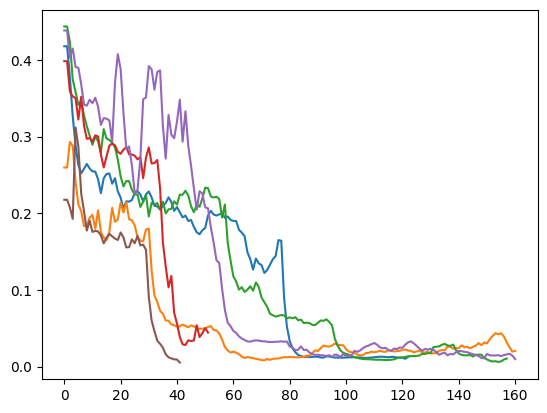

In [325]:
dir1 = '11_RS/'
dir2 = '11_RS_V/'
out = '13_RS/'
brngs = os.listdir(dir1)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs:
    df1 = pd.read_csv(dir1+brng)
    df2 = pd.read_csv(dir2+brng)
    df1.iloc[0,0] = df1.iloc[1,0]
    df2.iloc[0,0] = df2.iloc[1,0]
    #df1=exponential_moving_average_df(df1,0.45)
    #df2=exponential_moving_average_df(df2,0.45)

    df=((df1**1)*(df2**1))**1.5
    #df.to_csv(out+brng,index=False)
    #df=moving_average_df(df,3)
    df=exponential_moving_average_df(df,0.5)
    #df=moving_average_df(df,1)
    df.to_csv(out+brng,index=False)
    plt.plot(df)

In [326]:
dir = '13_RS/'
out = '13_RS/'
brngs = os.listdir(dir)
dataframes, dfs, lens =[], [], [0]
qtd=6

for brng in brngs:
    if brng.startswith('Bearing2_1'):
        path = dir+brng
        print(path)
        df = pd.read_csv(path)
        dataframes.append(df[:])
        lens.append(len(df[:])+lens[-1])
    else:
        path = dir+brng
        df = pd.read_csv(path)
        #minV = np.min(df['PC1'])
        #df = df-minV
        
        dataframes.append(+df)
        lens.append(len(df)+lens[-1])

df_r = pd.concat(dataframes,ignore_index=True)
df_r = normalize_df(df_r)
dataframes = [df_r[lens[i]:lens[i+1]] for i in range(len(lens)-1)]

for df,brng in zip(dataframes,brngs):
    df.to_csv(out+brng,index=False)
i=0

In [3]:
brngs

['Bearing1_1.csv',
 'Bearing1_2.csv',
 'Bearing1_3.csv',
 'Bearing1_5.csv',
 'Bearing2_2.csv',
 'Bearing2_4.csv']

[0.9411372  0.9411372  0.84790947 0.73260019 0.64705396]


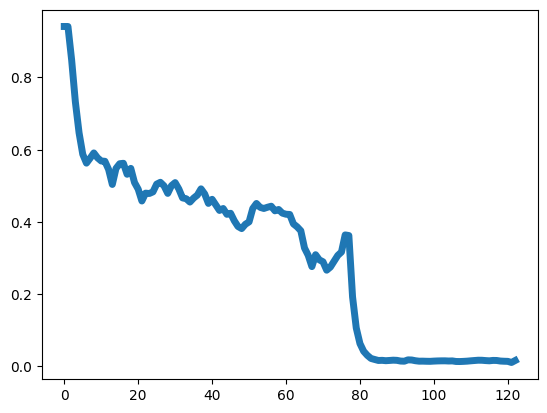

In [10]:
dir = '13_RS/'
out = '13_RS/'
brngs = os.listdir(dir)
brngs.sort(key=lambda x: int(re.search(r'\d+', x).group()))

for brng in brngs[:1]:
    df = pd.read_csv(dir+brng)
    print(df.iloc[:5,0].values)
    #df=exponential_moving_average_df(df,0.3)
    #df=df**4
    #df.to_csv(out+brng,index=False)
    plt.plot(df, linewidth=5)

Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


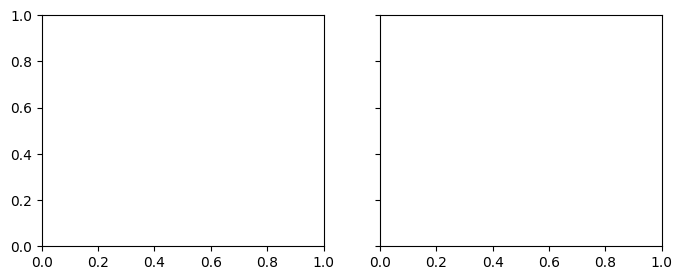

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)
for ax in axs:
    print(ax)

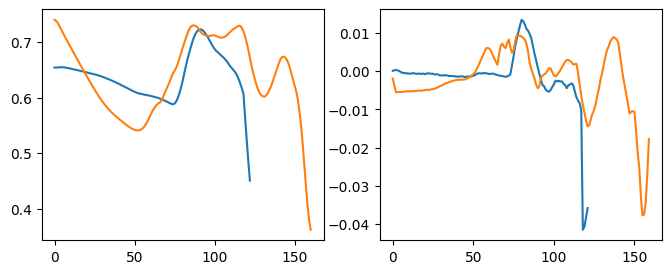

In [22]:
paths = ['09_HI/Bearing1_1.csv','09_HI/Bearing1_2.csv','09_HI/Bearing1_3.csv','09_HI/Bearing1_5.csv','09_HI/Bearing2_2.csv','09_HI/Bearing2_4.csv'][:2]
fig, axs = plt.subplots(1, 2, figsize=(8,3))
for path in paths:
    df = pd.read_csv(path)
    #df = exponential_moving_average_df(df,0.02)
    y1 = df['PC3'].values
    x1 = np.arange(0,len(y1))
    y2 = coef_ang(x1, y1)
    x2 = np.arange(0,len(y2))
    x = [x1,x2]
    y = [y1,y2]
    mx = [0.8,0.025]
    mn = [0.2,-0.025]
    for i,ax in enumerate(axs):
        ax.plot(x[i],y[i])
        #ax.set_ylim(mn[i],mx[i])

plt.show()